In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the dataset
df = pd.read_csv("students by age.csv",delimiter=';',encoding='cp1251')
df

,age,name,man,woman
0,моложе 15 лет,Алтайский край,0,0
1,моложе 15 лет,Амурская область,0,0
2,моложе 15 лет,Архангельская область,0,0
3,моложе 15 лет,Астраханская область,0,0
4,моложе 15 лет,Белгородская область,1,0
...,...,...,...,...
1591,40 лет и старше,Чеченская Республика,193,130
1592,40 лет и старше,Чувашская Республика,637,683
1593,40 лет и старше,Чукотский автономный округ,4,2
1594,40 лет и старше,Ямало-Ненецкий автономный округ,15,1


In [4]:
# defining two arrays with the name of the unique age groups and the unique regions
ages = df.age.unique()
regions= df.name.unique()
regions.shape

(84,)

In [5]:
# taking columns number [1,2,3,4] of the dataset into a numpy array
X = df.iloc[:,[0,1,2,3]].values
# defining a dictionary with the key "age" which contains an array of the required age groups for
# this study (15-29)
d ={"age": np.linspace(15,29,15)}
# adding empty keys to the dictionary each key represnts a region in Russia.
for i in regions:
    d[i] = []
# filling the list of each region with number of students from the dataset
for i in range(1596):
    ID=int(np.where(ages== X[i,0])[0])
    if ID>0 and ID<16:
        ID_2 = X[i,1]
        d[ID_2].append(float(X[i,2]+X[i,3]))
d = pd.DataFrame(d)

In [6]:
d

,age,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,Владимирская область,Волгоградская область,Вологодская область,...,Удмуртская Республика,Ульяновская область,Хабаровский край,Ханты-Мансийский автономный округ,Челябинская область,Чеченская Республика,Чувашская Республика,Чукотский автономный округ,Ямало-Ненецкий автономный округ,Ярославская область
0,15.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,16.0,2.0,0.0,0.0,52.0,3.0,2.0,4.0,9.0,2.0,...,2.0,3.0,3.0,0.0,7.0,33.0,0.0,0.0,0.0,4.0
2,17.0,687.0,201.0,108.0,814.0,663.0,436.0,296.0,1039.0,112.0,...,644.0,361.0,562.0,157.0,794.0,2255.0,324.0,0.0,0.0,348.0
3,18.0,5878.0,1308.0,1822.0,2346.0,4087.0,1960.0,2064.0,5464.0,1528.0,...,3815.0,3206.0,4162.0,1834.0,7489.0,4046.0,2869.0,5.0,0.0,3750.0
4,19.0,6269.0,1562.0,2038.0,3067.0,4811.0,2639.0,2531.0,6355.0,1971.0,...,4453.0,3735.0,4626.0,2422.0,8696.0,4787.0,3320.0,3.0,1.0,3324.0
5,20.0,7024.0,2019.0,2196.0,3667.0,6244.0,2962.0,3300.0,7774.0,2236.0,...,5056.0,4650.0,5157.0,2815.0,10416.0,5131.0,4291.0,5.0,1.0,4463.0
6,21.0,7570.0,1881.0,2319.0,3665.0,6622.0,3137.0,3402.0,8126.0,2426.0,...,5471.0,4884.0,5376.0,2813.0,11280.0,4241.0,4914.0,5.0,7.0,4539.0
7,22.0,5676.0,1569.0,1814.0,3222.0,6140.0,2608.0,2781.0,6830.0,1985.0,...,4811.0,4259.0,4114.0,2327.0,9221.0,3701.0,4202.0,2.0,29.0,3915.0
8,23.0,4526.0,1220.0,1620.0,2457.0,4975.0,2043.0,2233.0,5080.0,1671.0,...,3827.0,3285.0,3083.0,1926.0,7370.0,3133.0,3419.0,4.0,40.0,2830.0
9,24.0,2789.0,872.0,1040.0,1670.0,3300.0,1294.0,1437.0,3204.0,1121.0,...,2208.0,2039.0,1900.0,1215.0,5001.0,1940.0,2265.0,3.0,29.0,1947.0


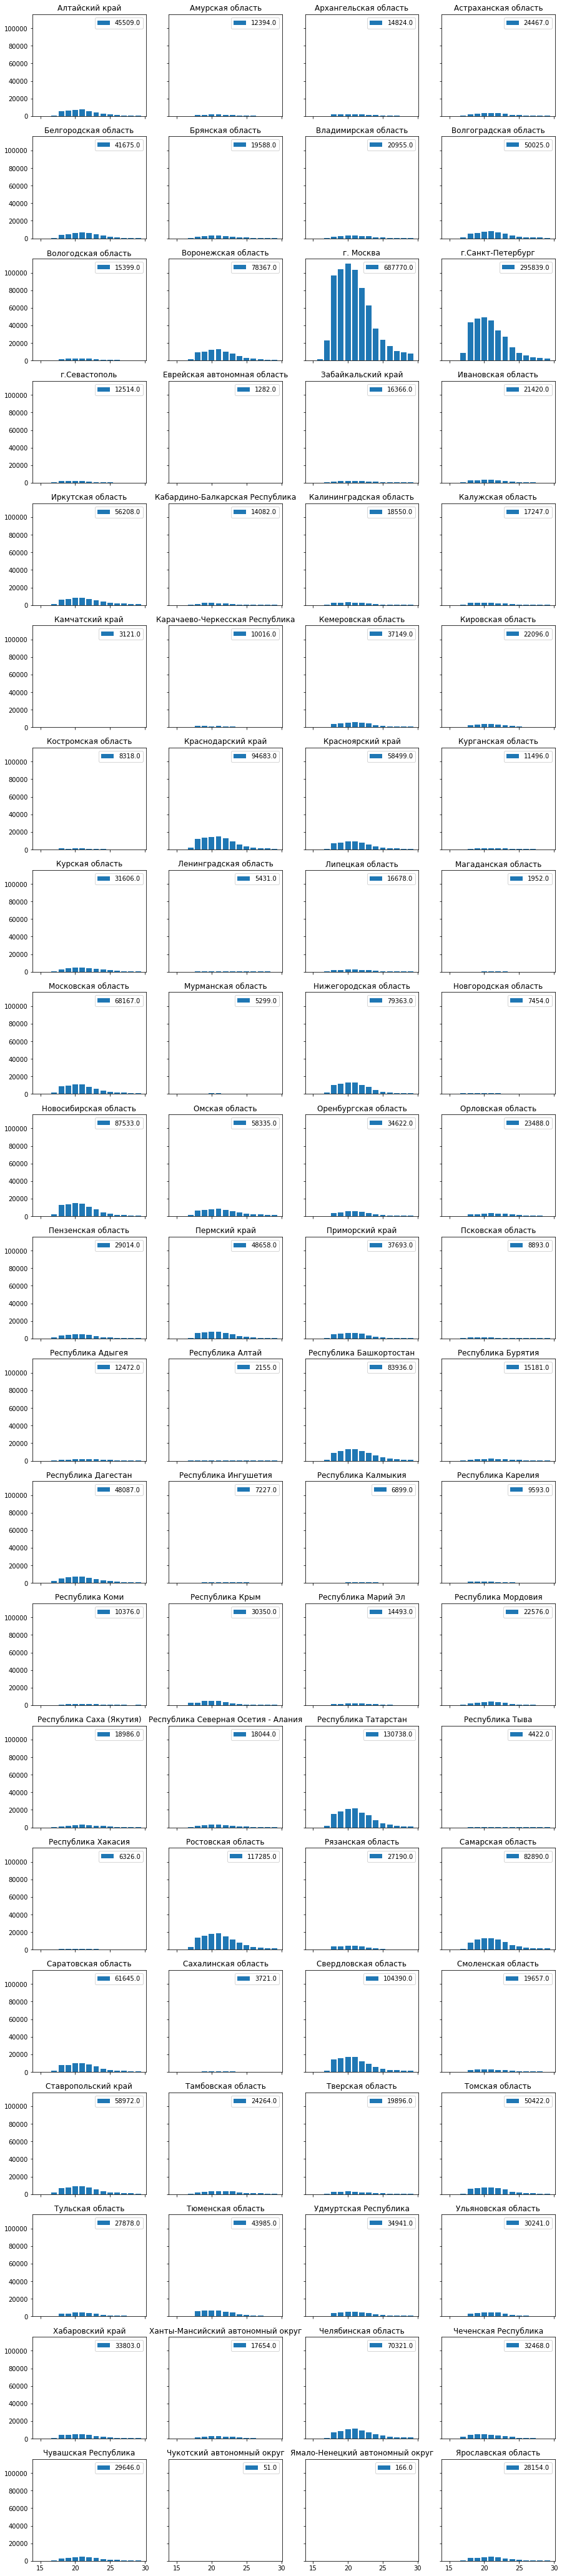

In [7]:
# plotting the distribution of the male and female students in each region
figure, axis = plt.subplots(21, 4,sharex=False, sharey=True,figsize=(15,75))
for i in range (1,85):
    l=int((i-1)/4)
    j=(i-1)%4
    #axis[l, j].bar(d_men.age[1:15], d_men.iloc[1:15,i])
    leg=d[regions[i-1]].sum()
    axis[l, j].bar(d.age, d.iloc[:,i],label=leg)
    
    axis[l, j].legend(loc ="upper right")

i=0    
for ax in axis.flat:
    ax.label_outer()
    ax.set_title(regions[i])
    i+=1

plt.show()

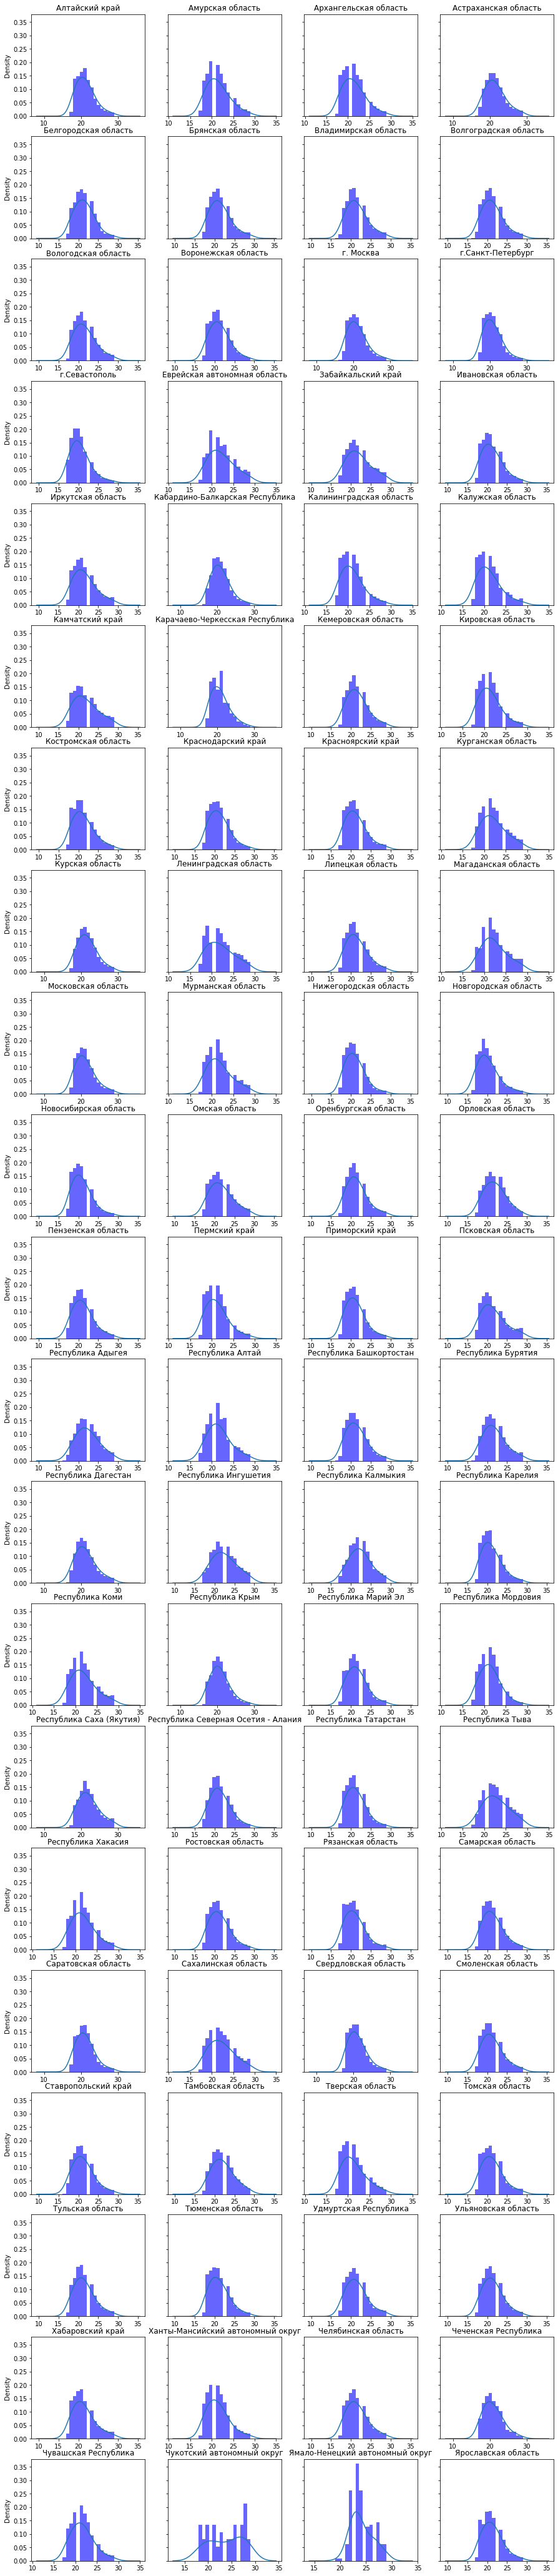

In [8]:
#plotting the density curve of male and female students in each region
figure, axis = plt.subplots(21, 4,sharex=False, sharey=True,figsize=(15,75))
for i in range (1,85):
    l=int((i-1)/4)
    j=(i-1)%4
    a = pd.Series(d.age.repeat(d.iloc[:,i]))
    a.plot.kde(ax=axis[l, j],bw_method=0.5)
    axis[l, j].hist(a,bins=15, density=True, alpha=0.6, color='b',rwidth=10)

i=0    
for ax in axis.flat:
    #ax.label_outer()
    ax.set_title(regions[i])
    i+=1

plt.show()